## Machine Learning models. Case $k=25$.
* *k-Nearest Neigbors*
* *Random Forest*
* *Adaptive Boosting*
* *Gradient Tree Boosting*

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('../../data/adult_k25_new.csv')
df.head()

,age,education,occupation,relationship,sex,native-country,salary-class
0,"[40, 80[",Graduate,Nontechnical,Not-in-family,Female,United-States,<=50K
1,"[40, 80[",Graduate,Nontechnical,Not-in-family,Female,United-States,<=50K
2,"[40, 80[",Graduate,Nontechnical,Not-in-family,Female,United-States,<=50K
3,"[40, 80[",Graduate,Nontechnical,Not-in-family,Female,United-States,>50K
4,"[40, 80[",Graduate,Nontechnical,Not-in-family,Female,United-States,>50K


In [3]:
age = preprocessing.LabelEncoder().fit(df['age'])
df['age'] = age.transform(df['age'])

education = preprocessing.LabelEncoder().fit(df['education'])
df['education'] = education.transform(df['education'])

relationship = preprocessing.LabelEncoder().fit(df['relationship'])
df['relationship'] = relationship.transform(df['relationship'])

occupation = preprocessing.LabelEncoder().fit(df['occupation'])
df['occupation'] = occupation.transform(df['occupation'])

sex = preprocessing.LabelEncoder().fit(df['sex'])
df['sex'] = sex.transform(df['sex'])

nc = preprocessing.LabelEncoder().fit(df['native-country'])
df['native-country'] = nc.transform(df['native-country'])

In [4]:
X = df[['age', 'education', 'relationship', 'occupation', 'sex', 'native-country']].values
y = df['salary-class'].values

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify = y)

In [6]:
clf = RandomForestClassifier(random_state=42)
param_grid = {'n_estimators': [5, 10, 15, 20], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9]}
grid_clf = GridSearchCV(clf, param_grid, cv=5)
grid_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                         'n_estimators': [5, 10, 15, 20]})

In [7]:
rf = grid_clf.best_estimator_
rf.score(X_test, y_test)

0.8162629267601643

In [8]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': list(range(3,51))}
grid_knn = GridSearchCV(knn, param_grid, cv=5)
grid_knn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                         24, 25, 26, 27, 28, 29, 30, 31, 32, ...]})

In [9]:
knn = grid_knn.best_estimator_
knn.score(X_test, y_test)

0.816971242385607

In [10]:
gb = GradientBoostingClassifier(random_state=42)
param_grid = {'n_estimators': [10, 50, 100, 150], 
              'learning_rate': [0.01, 0.1, 0.5, 1], 
              'max_depth': [2, 4, 6, 8, 10]}
grid_gb = GridSearchCV(gb, param_grid, cv=5)
grid_gb.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 0.5, 1],
                         'max_depth': [2, 4, 6, 8, 10],
                         'n_estimators': [10, 50, 100, 150]})

In [11]:
gb = grid_gb.best_estimator_
gb.score(X_test, y_test)

0.8176795580110497

In [12]:
ab = AdaBoostClassifier(random_state=42)
param_grid = {'n_estimators': [10, 50, 100, 150], 
              'learning_rate': [0.01, 0.1, 0.5, 1]}
grid_ab = GridSearchCV(ab, param_grid, cv=5)
grid_ab.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 0.5, 1],
                         'n_estimators': [10, 50, 100, 150]})

In [13]:
ab = grid_ab.best_estimator_
ab.score(X_test, y_test)

0.8164045898852529

In [14]:
from sklearn.metrics import classification_report, roc_curve, auc, f1_score

In [15]:
# RF:
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.84      0.93      0.88      5316
        >50K       0.69      0.47      0.56      1743

    accuracy                           0.82      7059
   macro avg       0.77      0.70      0.72      7059
weighted avg       0.80      0.82      0.80      7059



In [16]:
y_test_bin = [0 if y == '<=50K' else 1 for y in y_test]
y_pred_bin = [0 if y == '<=50K' else 1 for y in y_pred]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test_bin, y_pred_bin)
print(auc(fpr_rf, tpr_rf))

0.6987001537268066


In [17]:
print(f1_score(y_test_bin, y_pred_bin))

0.5562777967841259


In [18]:
# GB:
y_pred = gb.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.85      0.92      0.88      5316
        >50K       0.67      0.51      0.58      1743

    accuracy                           0.82      7059
   macro avg       0.76      0.71      0.73      7059
weighted avg       0.81      0.82      0.81      7059



In [19]:
y_test_bin = [0 if y == '<=50K' else 1 for y in y_test]
y_pred_bin = [0 if y == '<=50K' else 1 for y in y_pred]
fpr_gb, tpr_gb, thresholds = roc_curve(y_test_bin, y_pred_bin)
print(auc(fpr_gb, tpr_gb))

0.7139083583608863


In [20]:
print(f1_score(y_test_bin, y_pred_bin))

0.5795491669389089


In [21]:
# AB:
y_pred = ab.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.85      0.91      0.88      5316
        >50K       0.66      0.52      0.58      1743

    accuracy                           0.82      7059
   macro avg       0.76      0.72      0.73      7059
weighted avg       0.81      0.82      0.81      7059



In [22]:
y_test_bin = [0 if y == '<=50K' else 1 for y in y_test]
y_pred_bin = [0 if y == '<=50K' else 1 for y in y_pred]
fpr_ab, tpr_ab, thresholds = roc_curve(y_test_bin, y_pred_bin)
print(auc(fpr_ab, tpr_ab))

0.7167251722141711


In [23]:
print(f1_score(y_test_bin, y_pred_bin))

0.5830115830115831


In [24]:
# kNN:
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.85      0.91      0.88      5316
        >50K       0.66      0.53      0.59      1743

    accuracy                           0.82      7059
   macro avg       0.76      0.72      0.73      7059
weighted avg       0.81      0.82      0.81      7059



In [25]:
y_test_bin = [0 if y == '<=50K' else 1 for y in y_test]
y_pred_bin = [0 if y == '<=50K' else 1 for y in y_pred]
fpr_knn, tpr_knn, thresholds = roc_curve(y_test_bin, y_pred_bin)
print(auc(fpr_knn, tpr_knn))

0.7194150675582045


In [26]:
print(f1_score(y_test_bin, y_pred_bin))

0.5869565217391305


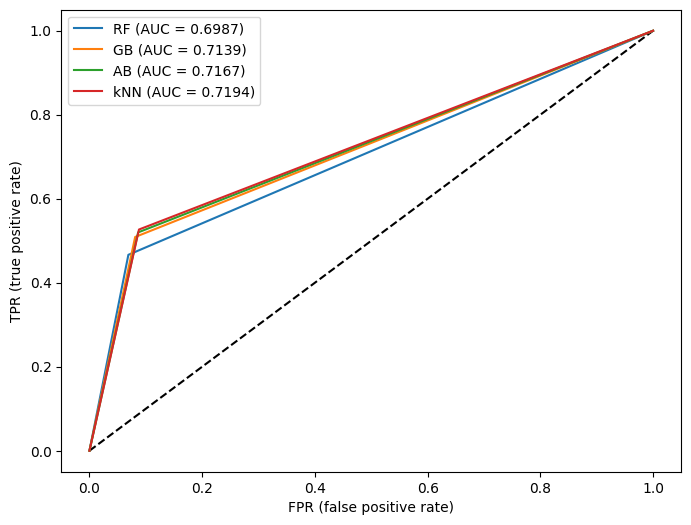

In [27]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize = (8, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF (AUC = {:.4f})'.format(auc(fpr_rf, tpr_rf)))
plt.plot(fpr_gb, tpr_gb, label='GB (AUC = {:.4f})'.format(auc(fpr_gb, tpr_gb)))
plt.plot(fpr_ab, tpr_ab, label='AB (AUC = {:.4f})'.format(auc(fpr_ab, tpr_ab)))
plt.plot(fpr_knn, tpr_knn, label='kNN (AUC = {:.4f})'.format(auc(fpr_knn, tpr_knn)))
plt.xlabel('FPR (false positive rate)')
plt.ylabel('TPR (true positive rate)')
plt.legend(loc='best')
plt.show()